In [5]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [6]:
df=pd.read_csv('winedataset.csv')

In [7]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [9]:

df.shape

(178, 14)

In [10]:
df['Target']= df.Class

In [11]:
df.dtypes


Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
Target                    int64
dtype: object

In [12]:
df.isnull().sum()  ## to check if there are any null values

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
Target                  0
dtype: int64

In [13]:
df['Target'].value_counts()

2    71
1    59
3    48
Name: Target, dtype: int64

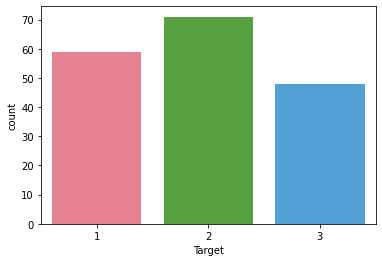

In [14]:
import seaborn as sns
sns.countplot(df['Target'], palette = 'husl')

In [15]:
df.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,Target
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717,1.000000
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130


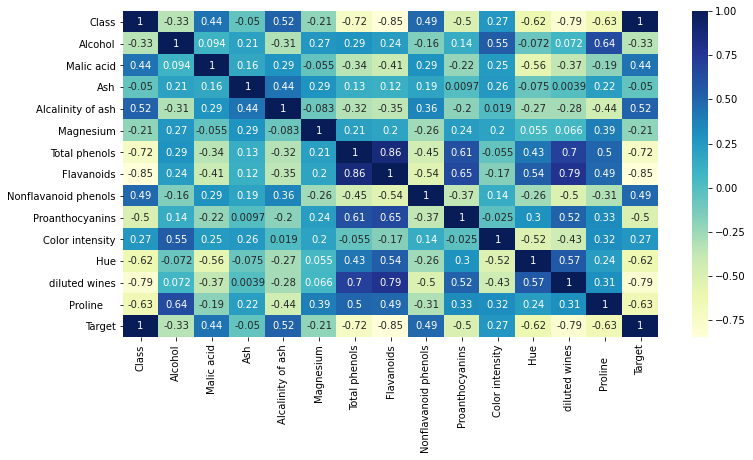

In [16]:

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True , cmap="YlGnBu")

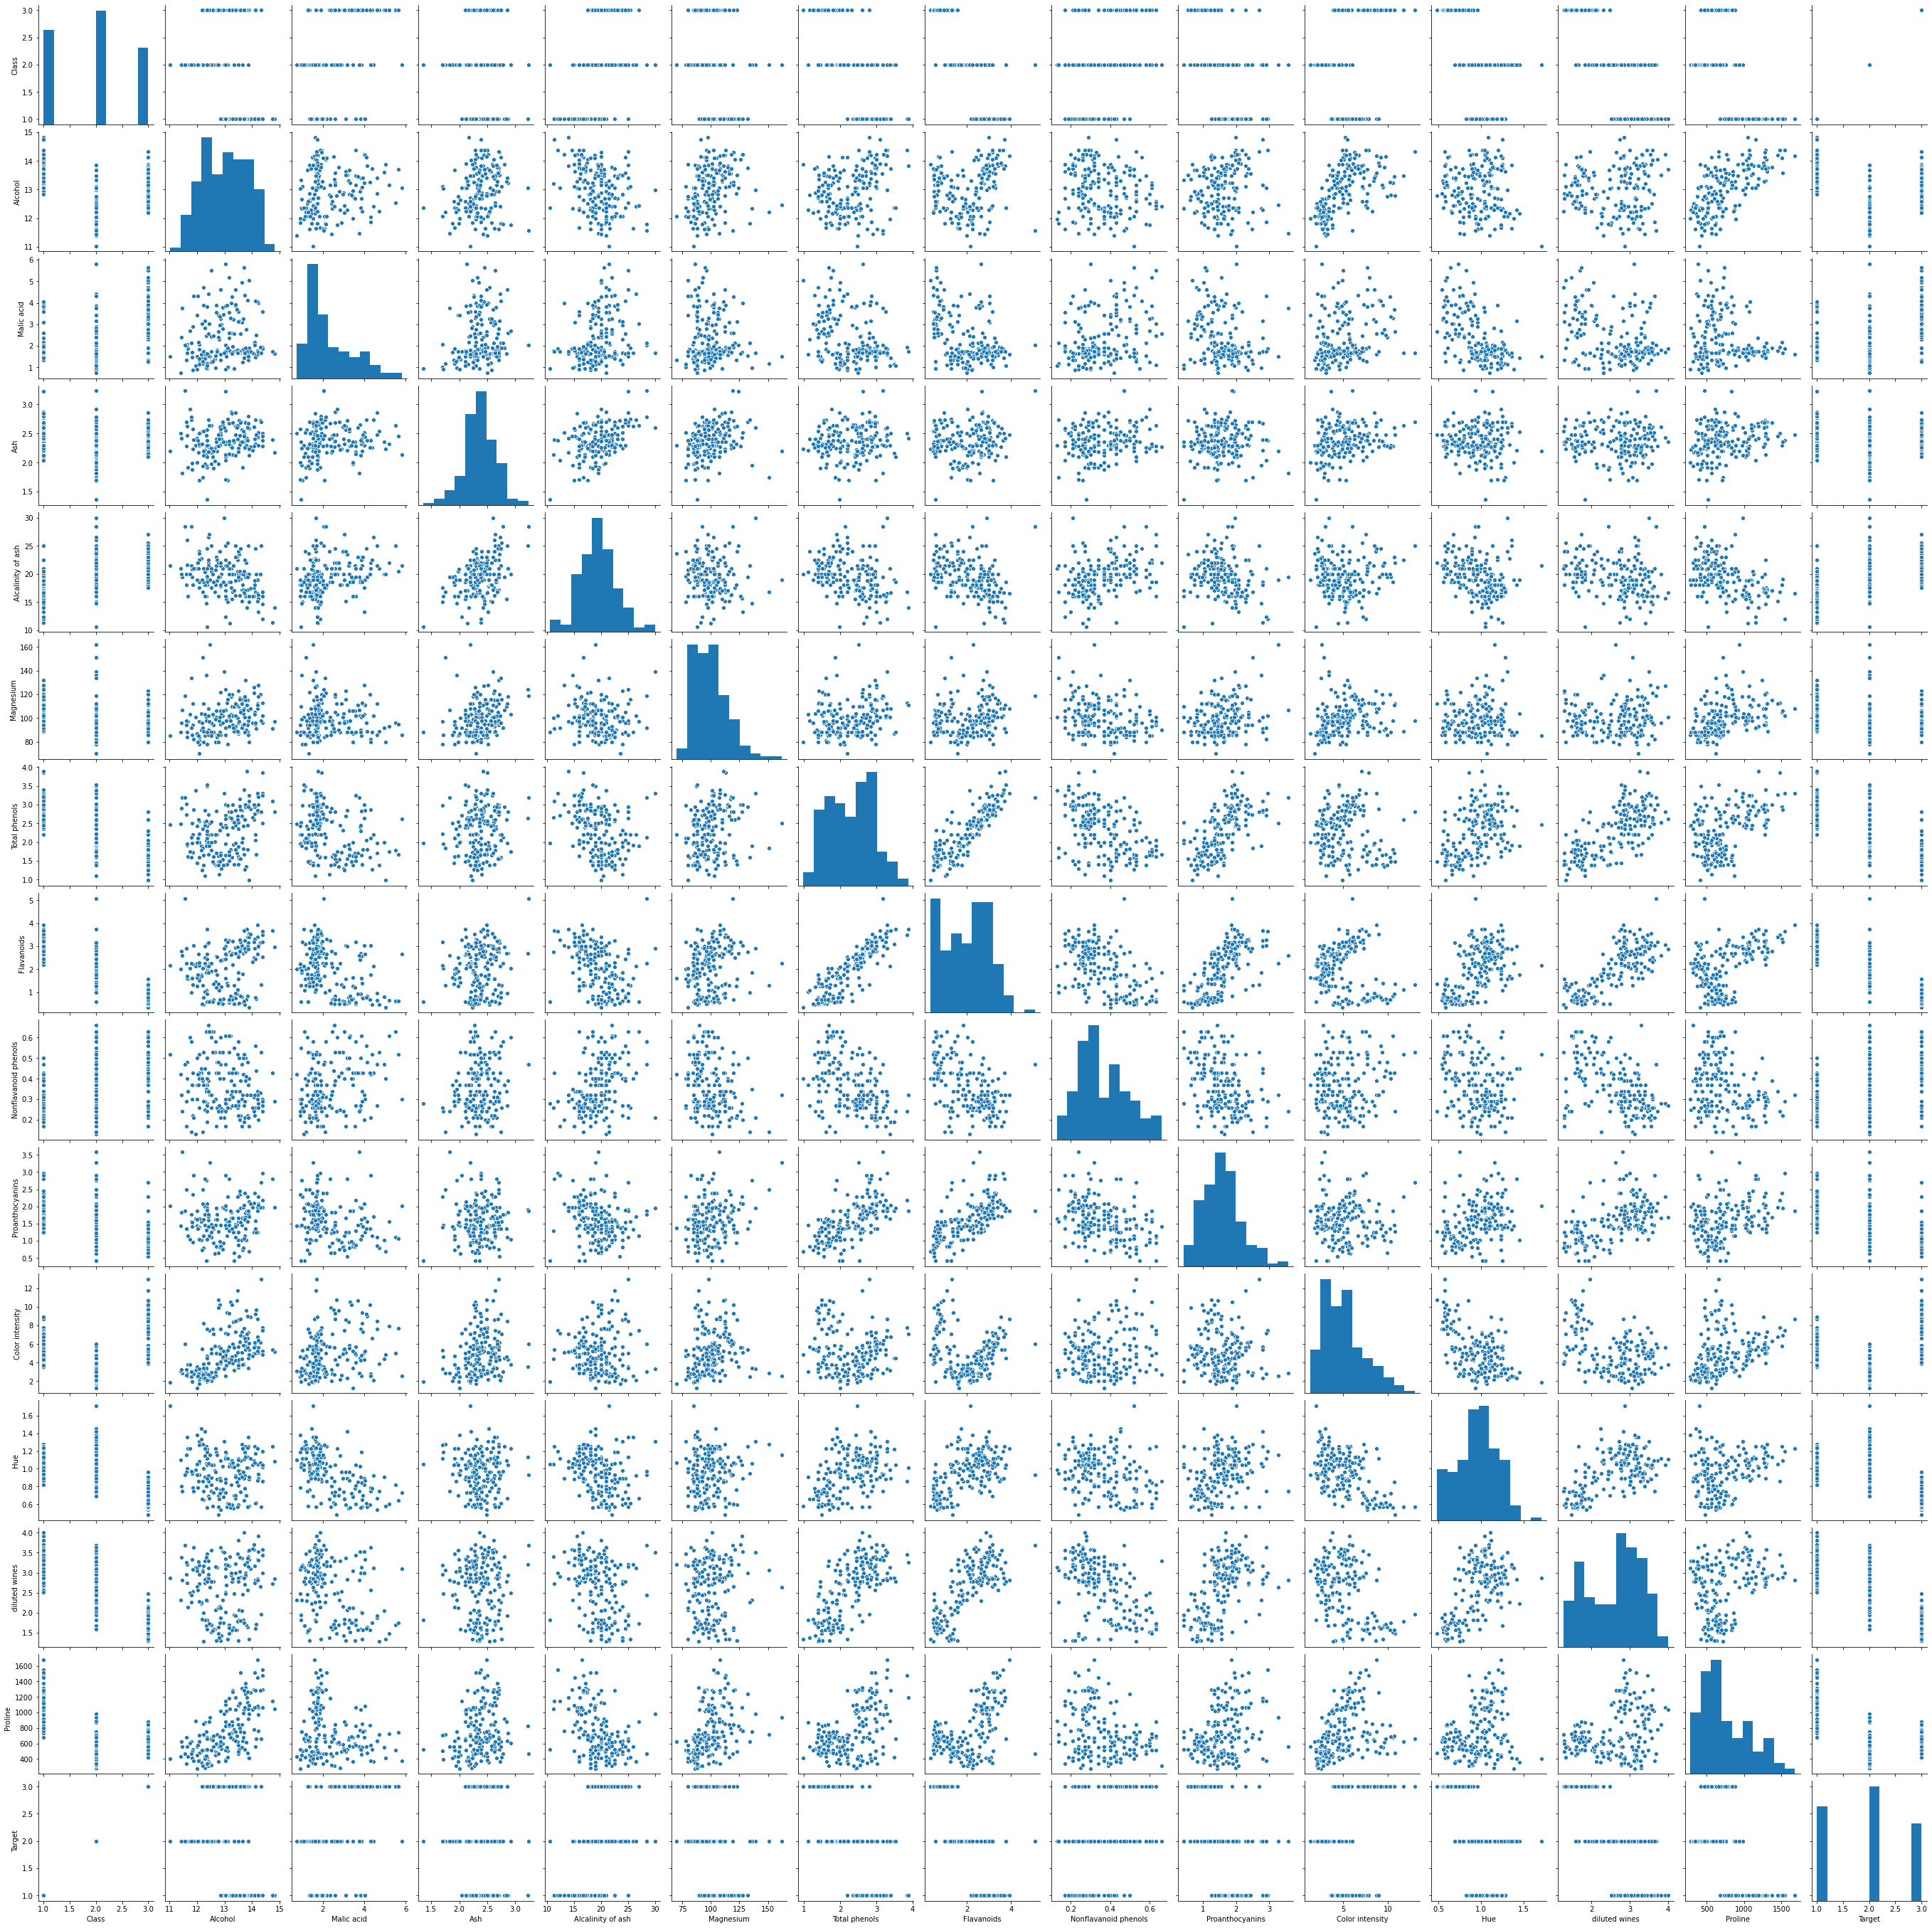

In [17]:
sns.pairplot(df)

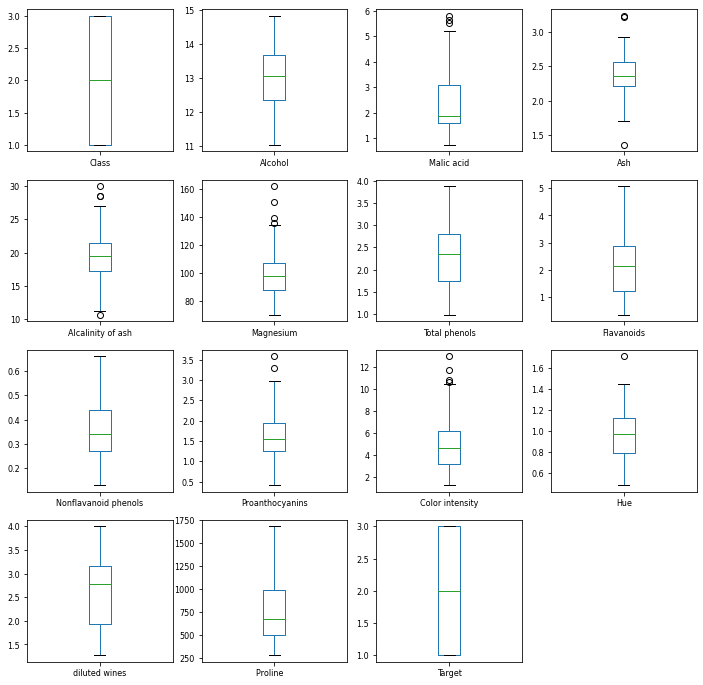

In [18]:
df.plot(kind='box', subplots=True, layout= (4,4), fontsize=8, figsize=(12,12));

In [19]:
df.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
Target                  0.107431
dtype: float64

# Removing outliers

In [20]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(178, 15)

In [21]:
threshold=3
print(np.where(z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7,  2, 10], dtype=int64))


In [22]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(178, 15)
(168, 15)


In [23]:
x=df_new.drop('Class',axis=1)
y=df_new['Class']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [25]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs well")
        print("At random state:-",i)
        print("Training r2 score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2 score is:-", r2_score(y_test,pred_test)*100)
        

At random state 0 the model performs well
At random state:- 0
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 1 the model performs well
At random state:- 1
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 2 the model performs well
At random state:- 2
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 3 the model performs well
At random state:- 3
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 4 the model performs well
At random state:- 4
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 5 the model performs well
At random state:- 5
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 6 the model performs well
At random state:- 6
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 7 the model performs well
At random state:- 7
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 8 the model performs well
At ran

At random state 69 the model performs well
At random state:- 69
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 70 the model performs well
At random state:- 70
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 71 the model performs well
At random state:- 71
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 72 the model performs well
At random state:- 72
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 73 the model performs well
At random state:- 73
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 74 the model performs well
At random state:- 74
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 75 the model performs well
At random state:- 75
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 76 the model performs well
At random state:- 76
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 77 the model per

At random state 149 the model performs well
At random state:- 149
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 150 the model performs well
At random state:- 150
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 151 the model performs well
At random state:- 151
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 152 the model performs well
At random state:- 152
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 153 the model performs well
At random state:- 153
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 154 the model performs well
At random state:- 154
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 155 the model performs well
At random state:- 155
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 156 the model performs well
At random state:- 156
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 235 the model performs well
At random state:- 235
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 236 the model performs well
At random state:- 236
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 237 the model performs well
At random state:- 237
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 238 the model performs well
At random state:- 238
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 239 the model performs well
At random state:- 239
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 240 the model performs well
At random state:- 240
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 241 the model performs well
At random state:- 241
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 242 the model performs well
At random state:- 242
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 314 the model performs well
At random state:- 314
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 315 the model performs well
At random state:- 315
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 316 the model performs well
At random state:- 316
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 317 the model performs well
At random state:- 317
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 318 the model performs well
At random state:- 318
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 319 the model performs well
At random state:- 319
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 320 the model performs well
At random state:- 320
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 321 the model performs well
At random state:- 321
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 389 the model performs well
At random state:- 389
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 390 the model performs well
At random state:- 390
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 391 the model performs well
At random state:- 391
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 392 the model performs well
At random state:- 392
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 393 the model performs well
At random state:- 393
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 394 the model performs well
At random state:- 394
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 395 the model performs well
At random state:- 395
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 396 the model performs well
At random state:- 396
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 467 the model performs well
At random state:- 467
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 468 the model performs well
At random state:- 468
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 469 the model performs well
At random state:- 469
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 470 the model performs well
At random state:- 470
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 471 the model performs well
At random state:- 471
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 472 the model performs well
At random state:- 472
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 473 the model performs well
At random state:- 473
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 474 the model performs well
At random state:- 474
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 543 the model performs well
At random state:- 543
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 544 the model performs well
At random state:- 544
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 545 the model performs well
At random state:- 545
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 546 the model performs well
At random state:- 546
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 547 the model performs well
At random state:- 547
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 548 the model performs well
At random state:- 548
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 549 the model performs well
At random state:- 549
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 550 the model performs well
At random state:- 550
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 613 the model performs well
At random state:- 613
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 614 the model performs well
At random state:- 614
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 615 the model performs well
At random state:- 615
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 616 the model performs well
At random state:- 616
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 617 the model performs well
At random state:- 617
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 618 the model performs well
At random state:- 618
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 619 the model performs well
At random state:- 619
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 620 the model performs well
At random state:- 620
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 695 the model performs well
At random state:- 695
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 696 the model performs well
At random state:- 696
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 697 the model performs well
At random state:- 697
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 698 the model performs well
At random state:- 698
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 699 the model performs well
At random state:- 699
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 700 the model performs well
At random state:- 700
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 701 the model performs well
At random state:- 701
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 702 the model performs well
At random state:- 702
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 773 the model performs well
At random state:- 773
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 774 the model performs well
At random state:- 774
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 775 the model performs well
At random state:- 775
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 776 the model performs well
At random state:- 776
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 777 the model performs well
At random state:- 777
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 778 the model performs well
At random state:- 778
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 779 the model performs well
At random state:- 779
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 780 the model performs well
At random state:- 780
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 843 the model performs well
At random state:- 843
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 844 the model performs well
At random state:- 844
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 845 the model performs well
At random state:- 845
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 846 the model performs well
At random state:- 846
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 847 the model performs well
At random state:- 847
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 848 the model performs well
At random state:- 848
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 849 the model performs well
At random state:- 849
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 850 the model performs well
At random state:- 850
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 920 the model performs well
At random state:- 920
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 921 the model performs well
At random state:- 921
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 922 the model performs well
At random state:- 922
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 923 the model performs well
At random state:- 923
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 924 the model performs well
At random state:- 924
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 925 the model performs well
At random state:- 925
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 926 the model performs well
At random state:- 926
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 927 the model performs well
At random state:- 927
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 

At random state 998 the model performs well
At random state:- 998
Training r2 score is:- 100.0
Testing r2 score is:- 100.0
At random state 999 the model performs well
At random state:- 999
Training r2 score is:- 100.0
Testing r2 score is:- 100.0


In [31]:
import pickle 
filename = 'project1.pkl'
pickle.dump(lr,open('winedata.csv', 'wb'))